In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import sklearn as skl
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

In [2]:
# make dataframe from csv
bank_df = pd.read_csv("bank-full_2.csv")
bank_df.head()

,Unnamed: 0,index,age,job,marital,education,credit_default,balance,housing_loan,personal_loan,contact,duration_sec,campaign,pdays,previous,poutcome,subscription,date,weekday
0,0,0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,2008-05-05,Monday
1,1,1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,2008-05-05,Monday
2,2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,2008-05-05,Monday
3,3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,2008-05-05,Monday
4,4,4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,2008-05-05,Monday


In [3]:
bank_df.isnull().values.any()

False

In [ ]:
print(f"Duplicate entries: {bank_df.duplicated().sum()}")

In [4]:
bank_df['age'].nunique()

77

In [5]:
bank_list=[]
bank_list=list(bank_df.select_dtypes(include=['object']).columns)
bank_list

['job',
 'marital',
 'education',
 'credit_default',
 'housing_loan',
 'personal_loan',
 'contact',
 'poutcome',
 'subscription',
 'date',
 'weekday']

In [6]:
thing =bank_df[bank_list].nunique()
thing

job                12
marital             3
education           4
credit_default      2
housing_loan        2
personal_loan       2
contact             3
poutcome            4
subscription        2
date              561
weekday             7
dtype: int64

In [7]:
bank_list_binary = ['credit_default','housing_loan','personal_loan','subscription']


In [8]:
# changing data type of binary choices from object to bool
for x in bank_list_binary:
    bank_df[x]=bank_df[x]=="yes"
bank_df[bank_list].nunique()

job                12
marital             3
education           4
credit_default      2
housing_loan        2
personal_loan       2
contact             3
poutcome            4
subscription        2
date              561
weekday             7
dtype: int64

In [9]:
# dropping uneeded columns
bank_df.drop('index',axis=1, inplace=True)

In [10]:
# change date to datetime format
bank_df['date']=pd.to_datetime(bank_df['date'])

# create data
dates = bank_df['date']

# calculate unix datetime
bank_df['date']=(dates - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')


bank_df.dtypes


Unnamed: 0         int64
age                int64
job               object
marital           object
education         object
credit_default      bool
balance            int64
housing_loan        bool
personal_loan       bool
contact           object
duration_sec       int64
campaign           int64
pdays              int64
previous           int64
poutcome          object
subscription        bool
date               int64
weekday           object
dtype: object

propbaly should run factoranalysis.
or dimensionality reductions via principal componet analysis.

In [11]:
bank_list=[]
bank_list=list(bank_df.select_dtypes(include=['object','category']).columns)
bank_list

['job', 'marital', 'education', 'contact', 'poutcome', 'weekday']

In [12]:
bank_df[bank_list].nunique()

job          12
marital       3
education     4
contact       3
poutcome      4
weekday       7
dtype: int64

In [13]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(bank_df[bank_list]))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(bank_list)
encode_df.head()

c:\Users\rab_b\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Merge the two DataFrames together and drop the Country column
bank_df=bank_df.merge(encode_df,left_index=True,right_index=True).drop(bank_list,1)


C:\Users\rab_b\AppData\Local\Temp\ipykernel_7148\2310923932.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  bank_df=bank_df.merge(encode_df,left_index=True,right_index=True).drop(bank_list,1)


In [15]:
bank_df.drop('Unnamed: 0',axis=1, inplace=True)
bank_df

,age,credit_default,balance,housing_loan,personal_loan,duration_sec,campaign,pdays,previous,subscription,...,poutcome_other,poutcome_success,poutcome_unknown,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,58,False,2143,True,False,261,1,-1,0,False,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,44,False,29,True,False,151,1,-1,0,False,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,33,False,2,True,True,76,1,-1,0,False,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,47,False,1506,True,False,92,1,-1,0,False,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,33,False,1,False,False,198,1,-1,0,False,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,False,825,False,False,977,3,-1,0,True,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45207,71,False,1729,False,False,456,2,-1,0,True,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,72,False,5715,False,False,1127,5,184,3,True,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45209,57,False,668,False,False,508,4,-1,0,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [16]:
bank_df.dtypes

age                      int64
credit_default            bool
balance                  int64
housing_loan              bool
personal_loan             bool
duration_sec             int64
campaign                 int64
pdays                    int64
previous                 int64
subscription              bool
date                     int64
job_admin.             float64
job_blue-collar        float64
job_entrepreneur       float64
job_housemaid          float64
job_management         float64
job_retired            float64
job_self-employed      float64
job_services           float64
job_student            float64
job_technician         float64
job_unemployed         float64
job_unknown            float64
marital_divorced       float64
marital_married        float64
marital_single         float64
education_primary      float64
education_secondary    float64
education_tertiary     float64
education_unknown      float64
contact_cellular       float64
contact_telephone      float64
contact_

In [17]:
# set up data x and y
y = bank_df.subscription
X = bank_df.drop(columns="subscription")

In [18]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [19]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_scaled = X_scaler.transform(X)

In [20]:
X_scaled= pd.DataFrame(X_scaled)

In [21]:
X_scaled.columns=X.columns
X_scaled

,age,credit_default,balance,housing_loan,personal_loan,duration_sec,campaign,pdays,previous,date,...,poutcome_other,poutcome_success,poutcome_unknown,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,1.605979,-0.134556,0.247713,0.892601,-0.436183,0.010023,-0.565258,-0.409922,-0.299175,-1.028903,...,-0.205116,-0.184906,0.470886,-0.487868,1.933837,-0.026053,-0.022397,-0.526393,-0.471026,-0.495360
1,0.287603,-0.134556,-0.430397,0.892601,-0.436183,-0.415457,-0.565258,-0.409922,-0.299175,-1.028903,...,-0.205116,-0.184906,0.470886,-0.487868,1.933837,-0.026053,-0.022397,-0.526393,-0.471026,-0.495360
2,-0.748264,-0.134556,-0.439058,0.892601,2.292616,-0.705557,-0.565258,-0.409922,-0.299175,-1.028903,...,-0.205116,-0.184906,0.470886,-0.487868,1.933837,-0.026053,-0.022397,-0.526393,-0.471026,-0.495360
3,0.570112,-0.134556,0.043382,0.892601,-0.436183,-0.643669,-0.565258,-0.409922,-0.299175,-1.028903,...,-0.205116,-0.184906,0.470886,-0.487868,1.933837,-0.026053,-0.022397,-0.526393,-0.471026,-0.495360
4,-0.748264,-0.134556,-0.439378,-1.120322,-0.436183,-0.233661,-0.565258,-0.409922,-0.299175,-1.028903,...,-0.205116,-0.184906,0.470886,-0.487868,1.933837,-0.026053,-0.022397,-0.526393,-0.471026,-0.495360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.946791,-0.134556,-0.175063,-1.120322,-0.436183,2.779512,0.071459,-0.409922,-0.299175,3.559365,...,-0.205116,-0.184906,0.470886,-0.487868,-0.517107,-0.026053,-0.022397,-0.526393,-0.471026,2.018734
45207,2.830185,-0.134556,0.114914,-1.120322,-0.436183,0.764283,-0.246900,-0.409922,-0.299175,3.559365,...,-0.205116,-0.184906,0.470886,-0.487868,-0.517107,-0.026053,-0.022397,-0.526393,-0.471026,2.018734
45208,2.924355,-0.134556,1.393507,-1.120322,-0.436183,3.359712,0.708176,1.438609,1.276209,3.559365,...,-0.205116,5.408141,-2.123655,-0.487868,-0.517107,-0.026053,-0.022397,-0.526393,-0.471026,2.018734
45209,1.511809,-0.134556,-0.225424,-1.120322,-0.436183,0.965419,0.389817,-0.409922,-0.299175,3.559365,...,-0.205116,-0.184906,0.470886,-0.487868,-0.517107,-0.026053,-0.022397,-0.526393,-0.471026,2.018734


In [37]:
# Define the logistic regression model
log_classifier = LogisticRegression(solver="lbfgs",max_iter=50)

# Train the model
log_classifier.fit(X_train_scaled,y_train)

# Evaluate the model
y_pred_test = log_classifier.predict(X_test_scaled)
y_pred_train = log_classifier.predict(X_train_scaled)

print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, y_pred_train))
print('Precision:', precision_score(y_train, y_pred_train))
print('Recall:', recall_score(y_train, y_pred_train))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test)) 
print('Recall:', recall_score(y_test, y_pred_test)) 

Training set metrics:
Accuracy: 0.906098855727262
Precision: 0.669061707523246
Recall: 0.3973393574297189
Test set metrics:
Accuracy: 0.9035654251083783
Precision: 0.6335403726708074
Recall: 0.39080459770114945


In [34]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=15, random_state=1)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# evaluate training
print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')

# Evaluate the model
y_pred_test = rf_model.predict(X_test_scaled)
y_pred_train = rf_model.predict(X_train_scaled)


print('Training set metrics:')
print('Accuracy:', accuracy_score(y_train, y_pred_train))
print('Precision:', precision_score(y_train, y_pred_train))
print('Recall:', recall_score(y_train, y_pred_train))

print('Test set metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_test)) 
print('Precision:', precision_score(y_test, y_pred_test)) 
print('Recall:', recall_score(y_test, y_pred_test)) 

Training Score: 0.9973162675474814
Training set metrics:
Accuracy: 0.9973162675474814
Precision: 0.9969364309420475
Recall: 0.9801706827309237
Test set metrics:
Accuracy: 0.9071927806776962
Precision: 0.634453781512605
Recall: 0.46283524904214557


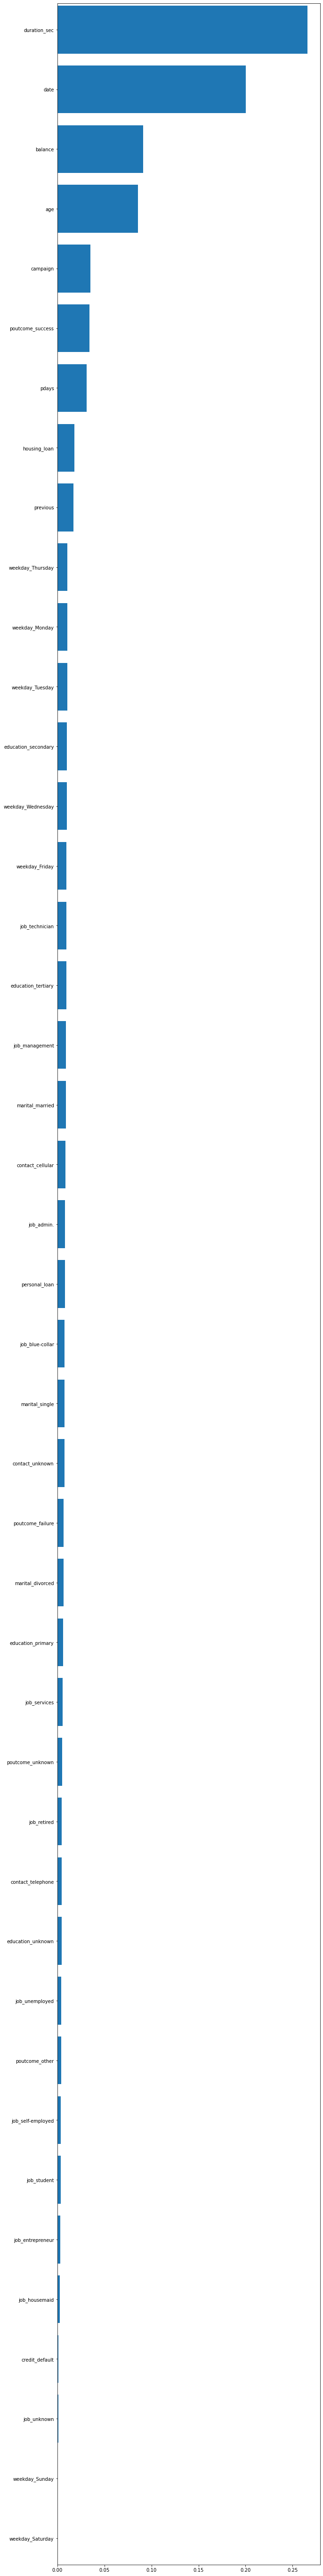

In [27]:
features = rf_model.feature_importances_
features = sorted(zip(X.columns, rf_model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,100)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()